In [5]:
!pip install librosa

In [6]:
!pip install scipy

In [3]:
!pip install soundfile


In [4]:
#Normalized without built-in
import numpy as np
import scipy.io.wavfile as wav

def normalize_audio(audio_data):
    # Calculate the maximum absolute amplitude
    max_amp = np.max(np.abs(audio_data))
    
    # Scale the audio data to have maximum absolute amplitude of 1
    normalized_audio = audio_data / max_amp
    
    return normalized_audio

def main():
    # Load audio file
    fs, audio_data = wav.read('sample.wav')
    
    # Normalize the audio data
    normalized_audio = normalize_audio(audio_data)
    
    # Save normalized audio to file
    wav.write('newsample.wav', fs, normalized_audio.astype(np.float32))

if __name__ == "__main__":
    main()


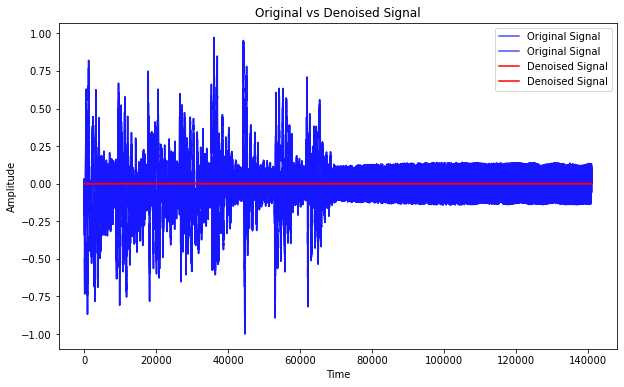

In [5]:
#Removing Noise
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Function to perform spectral subtraction
def spectral_subtraction(signal, noise):
    alpha = 2  # Sensitivity parameter (adjustable)
    
    # Calculate the power spectra of signal and noise
    signal_power = np.abs(np.fft.fft(signal)) ** 2
    noise_power = np.abs(np.fft.fft(noise)) ** 2
    
    # Perform spectral subtraction
    reduced_power = np.maximum(0, signal_power - alpha * noise_power)
    
    # Inverse Fourier transform to get the denoised signal
    denoised_signal = np.fft.ifft(np.sqrt(reduced_power)).real
    
    return denoised_signal.astype(np.int16)

def main():
    # Load audio files (replace with your file paths)
    fs_signal, signal = wav.read('newsample.wav')
    fs_noise, noise = wav.read('newsample.wav')
    
    # Ensure both audio files have the same sampling rate
    assert fs_signal == fs_noise, "Sampling rates of signal and noise must be the same"
    
    # Perform spectral subtraction for noise reduction
    denoised_signal = spectral_subtraction(signal, noise)
    
    # Plot the original and denoised signals
    plt.figure(figsize=(10, 6))
    plt.plot(signal, label='Original Signal', color='b', alpha=0.7)
    plt.plot(denoised_signal, label='Denoised Signal', color='r')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Original vs Denoised Signal')
    plt.legend()
    plt.show()
    
    # Save the denoised signal to a new file
    wav.write('denoised_signal.wav', fs_signal, denoised_signal)

if __name__ == "__main__":
    main()


In [11]:
!pip install pydub

In [8]:
#Trimming Audio file
from pydub import AudioSegment

def trim_audio(input_file, output_file, start_ms, end_ms):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)
    
    # Trim the audio
    trimmed_audio = audio[start_ms:end_ms]
    
    # Export the trimmed audio to a new file
    trimmed_audio.export(output_file, format="wav")

def main():
    # Input audio file path
    input_file = 'denoised_signal.wav'
    
    # Output audio file path
    output_file = 'demotrim.wav'
    
    # Start and end times in milliseconds (adjust as needed)
    start_ms = 10000  # Start time (10 seconds)
    end_ms = 40000    # End time (30 seconds)
    
    # Trim the audio
    trim_audio(input_file, output_file, start_ms, end_ms)
    
    print("Trimming completed!")

if __name__ == "__main__":
    main()


Trimming completed!


In [5]:
!pip install librosa


  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Local\\Temp\\pip-uninstall-cm88lte2\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



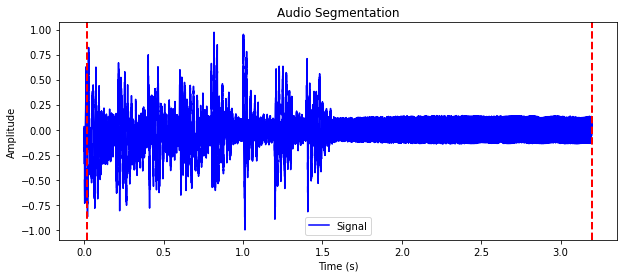

In [11]:
#Segmentation
import numpy as np
import librosa
import matplotlib.pyplot as plt

def audio_segmentation(audio_file, threshold=0.05):
    # Load the audio file
    signal, sr = librosa.load(audio_file, sr=None)
    
    # Calculate the short-time energy of the signal
    window_size = int(0.02 * sr)  # 20 ms window size
    energy = np.array([sum(abs(signal[i:i+window_size]**2)) for i in range(0, len(signal), window_size)])
    
    # Apply thresholding to detect segments
    segments = []
    segment_start = 0
    for i in range(len(energy)):
        if energy[i] > threshold:
            if segment_start == 0:
                segment_start = i * window_size
        else:
            if segment_start != 0:
                segment_end = i * window_size
                segments.append((segment_start, segment_end))
                segment_start = 0
    
    # Add the last segment if it exists
    if segment_start != 0:
        segment_end = len(signal)
        segments.append((segment_start, segment_end))
    
    return segments

def plot_segments(signal, segments, sr):
    # Plot the signal with segments
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(signal)) / sr, signal, color='b', label='Signal')
    for segment in segments:
        plt.axvline(segment[0] / sr, color='r', linestyle='--', linewidth=2)
        plt.axvline(segment[1] / sr, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Segmentation')
    plt.legend()
    plt.show()

def main():
    # Audio file path
    audio_file = 'newsample.wav'
    
    # Threshold for energy-based segmentation
    threshold = 0.5
    
    # Perform audio segmentation
    segments = audio_segmentation(audio_file, threshold)
    
    # Plot the signal with segments
    signal, sr = librosa.load(audio_file, sr=None)
    plot_segments(signal, segments, sr)

if __name__ == "__main__":
    main()


In [12]:
#Elimination(Remove)
import os

def delete_audio_file(audio_file):
    try:
        os.remove(audio_file)
        print(f"Audio file '{audio_file}' has been successfully deleted.")
    except FileNotFoundError:
        print(f"Audio file '{audio_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

def main():
    audio_file = 'demotrim.wav'  # Replace with the path to your audio file
    delete_audio_file(audio_file)

if __name__ == "__main__":
    main()


Audio file 'demotrim.wav' has been successfully deleted.
